### Perceptron

### Basic Example (AND Gate)

<br>

<img src="https://www.robotshop.com/community/uploads/a/b/abram/Logic%20Gates/AND.jpg" width="600" height="600"/>


[-0.27143234]
[0.20733981]
[0.28761386]
[0.766386]
[[0.55904619 0.47877215]]


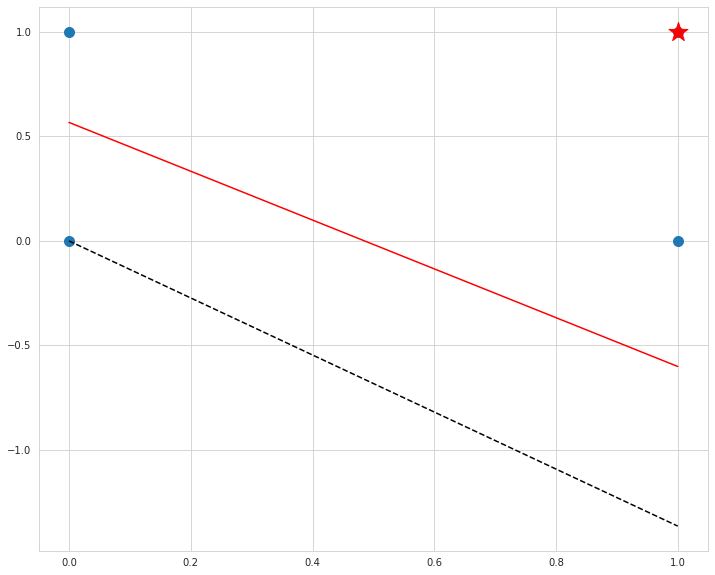

In [100]:
# Perceptron with Adaline (Initial Neuron Model)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))

learning_rate = 0.001
epochs = 1000
w = np.random.random((1,2))
b = np.zeros(1)

x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

label = np.array([0, 0, 0, 1])

data_lenth = len(x)

# Visualization initial line

plt.scatter(x[:,0], x[:,1], s=100)
plt.scatter(1, 1, s=400, c='r', marker='*')
x_line = np.linspace(-0, 1, 100)
y_line = -w[0,0] / w[0,1] * x_line - b / w[0,1]
plt.plot(x_line, y_line, '--k', label='initial line')

# Perceptron Model

for epoch in range(epochs):
#     print(f"---------- {str(epoch)}th epoch ----------")
    for i in range(data_lenth):
        # 1) Calculate Output
        # y = w1*x1+w2*x2+b
        y = np.dot(w,x[i]) + b
        
        # 2) Calculate Error
        error = label[i] - y
        
        # 3) Calculate delta weight(Cost Function : MSE)
        delta_W = learning_rate * error * x[i]
        delta_b = learning_rate * error * 1
        
        # 4) Update weight and bias
        w = w + delta_W
        b = b + delta_b

for i in range(0, data_lenth):
    y = np.dot(w, np.transpose(x[i,:])) + b
    print(y)

print(w)

# Visualization final line

x_line = np.linspace(-0, 1, 100)
y_line = -w[0,0] / w[0,1] * x_line - b / w[0,1]
plt.plot(x_line, y_line, 'r', label='final line')

[0.00048105]
[0.06714122]
[0.06714869]
[0.91499963]
[[ 5.00772373  5.00760445 -3.35075953]]


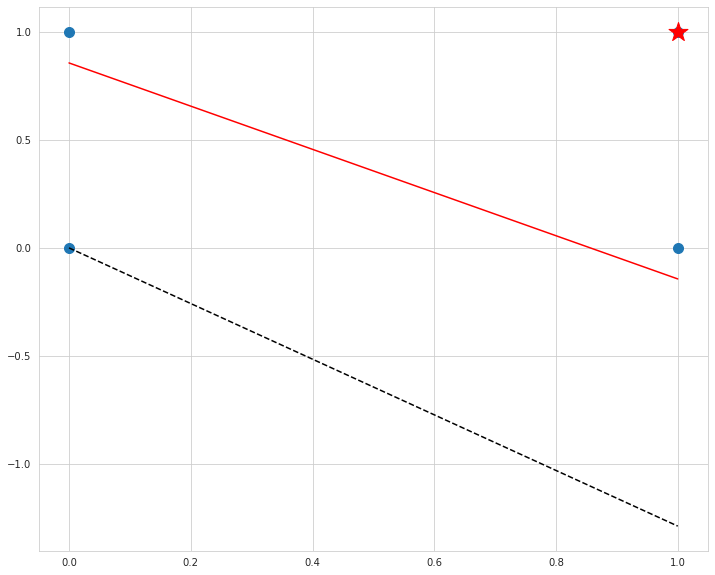

In [101]:
# Perceptron with Sigmoid

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))

learning_rate = 0.01
epochs = 50000
w = np.random.random((1,3))
b = np.zeros(1)

x = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

label = np.array([0, 0, 0, 1])

data_lenth = len(x)

# Visualization initial line

plt.scatter(x[:,0], x[:,1], s=100)
plt.scatter(1, 1, s=400, c='r', marker='*')
x_line = np.linspace(-0, 1, 100)
y_line = -w[0,0] / w[0,1] * x_line - b / w[0,1]
plt.plot(x_line, y_line, '--k', label='initial line')

# Perceptron Model & Sigmoid

def sigmoid(x):
    return 1/(1+np.exp(-x))

for epoch in range(epochs):
#     print(f"---------- {str(epoch)}th epoch ----------")
    for i in range(data_lenth):
        # 1) Calculate Output
        # y = w1*x1+w2*x2+b
        y = sigmoid(np.dot(w,x[i]) + b)
        
        # 2) Calculate Error
        error = label[i] - y
        
        # 3) Calculate delta weight(Cost Function : MSE)
        delta_W = learning_rate * (1-y) * y * error * x[i]
        delta_b = learning_rate * (1-y) * y * error * 1
        
        # 4) Update weight and bias
        w = w + delta_W
        b = b + delta_b

for i in range(0, data_lenth):
    y = sigmoid(np.dot(w, np.transpose(x[i,:])) + b)
    print(y)

print(w)

# Visualization final line

x_line = np.linspace(-0, 1, 100)
y_line = -w[0,0] / w[0,1] * x_line - b / w[0,1]
plt.plot(x_line, y_line, 'r', label='final line')

### Keras

<br>

![image](https://jsideas.net/assets/materials/20171126/keras-tensorflow.jpg)

In [9]:
from tensorflow.keras import models, layers
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

T = np.array([0, 0, 0, 1])

# 1) model을 만든다.
model = models.Sequential()
model.add(layers.Dense(units = 1, activation = 'linear', use_bias=True))
# units : Number of neuron(node), use_bias : bias 여부

# 2) 세부 학습 속성을 설정한다.
model.compile(optimizer='sgd', # Stochastic Gradient Descent(확률적 경사하강법), optimize : 
             loss='mse', # loss : 현재 network에 의해서 나온 y와 실제 나와야하는 T사잇값의 차이 error를 정의
             metrics = ['acc'])

# 3) 학습한다.
model.fit(X,T,epochs = 1000,batch_size=4)

Epoch 1/1000
1/1 [==============================] - 0s 157ms/step - loss: 0.5667 - acc: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5494 - acc: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5331 - acc: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5177 - acc: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5032 - acc: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4894 - acc: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4764 - acc: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4641 - acc: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4524 - acc: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4414 - acc: 0.5000
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - 

1/1 [==============================] - 0s 5ms/step - loss: 0.1274 - acc: 0.7500
Epoch 175/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1269 - acc: 0.7500
Epoch 176/1000
1/1 [==============================] - ETA: 0s - loss: 0.1264 - acc: 0.750 - 0s 4ms/step - loss: 0.1264 - acc: 0.7500
Epoch 177/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1259 - acc: 0.7500
Epoch 178/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1254 - acc: 0.7500
Epoch 179/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1249 - acc: 0.7500
Epoch 180/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1244 - acc: 0.7500
Epoch 181/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1239 - acc: 0.7500
Epoch 182/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1235 - acc: 0.7500
Epoch 183/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1230 - acc: 0.7500
Epoch 184/1000
1/1 [======

1/1 [==============================] - 0s 3ms/step - loss: 0.0804 - acc: 1.0000
Epoch 346/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0802 - acc: 1.0000
Epoch 347/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0801 - acc: 1.0000
Epoch 348/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0800 - acc: 1.0000
Epoch 349/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0799 - acc: 1.0000
Epoch 350/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0797 - acc: 1.0000
Epoch 351/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0796 - acc: 1.0000
Epoch 352/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0795 - acc: 1.0000
Epoch 353/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0794 - acc: 1.0000
Epoch 354/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0792 - acc: 1.0000
Epoch 355/1000
1/1 [==============================] - 0s 3ms/step

Epoch 516/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0678 - acc: 1.0000
Epoch 517/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0678 - acc: 1.0000
Epoch 518/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0678 - acc: 1.0000
Epoch 519/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0677 - acc: 1.0000
Epoch 520/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0677 - acc: 1.0000
Epoch 521/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0676 - acc: 1.0000
Epoch 522/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0676 - acc: 1.0000
Epoch 523/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0676 - acc: 1.0000
Epoch 524/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0675 - acc: 1.0000
Epoch 525/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0675 - acc: 1.0000
Epoch 526/1000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 0.0642 - acc: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0642 - acc: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0642 - acc: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0641 - acc: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641 - acc: 1.0000
Epoch 692/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0641 - acc: 1.0000
Epoch 693/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641 - acc: 1.0000
Epoch 694/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641 - acc: 1.0000
Epoch 695/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0641 - acc: 1.0000
Epoch 696/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0641 - acc: 1.0000
Epoch 697/1000
1/1 [==============================] - 0s 2ms/step

Epoch 859/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630 - acc: 1.0000
Epoch 860/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0630 - acc: 1.0000
Epoch 861/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0630 - acc: 1.0000
Epoch 862/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0630 - acc: 1.0000
Epoch 863/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0630 - acc: 1.0000
Epoch 864/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630 - acc: 1.0000
Epoch 865/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630 - acc: 1.0000
Epoch 866/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0630 - acc: 1.0000
Epoch 867/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630 - acc: 1.0000
Epoch 868/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0630 - acc: 1.0000
Epoch 869/1000
1/1 [==============================

In [10]:
# 4) predict
# test
Xtest_loss,Xtest_acc = model.evaluate(X,T)
print(Xtest_acc)
Ttest = model.predict(X)
print(Ttest)

1/1 [==============================] - 0s 18ms/step - loss: 0.0627 - acc: 1.0000
1.0
[[-0.22638725]
 [ 0.25735205]
 [ 0.25005913]
 [ 0.7337984 ]]


### IRIS Data with Keras

##### Acivation Function : Linear

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses, optimizers

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 1) split train & test data-set
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=1/3,
                                                   random_state=0)

# 2) Perceptron Model
# 2-1) Generate Single Perceptron Model
model = models.Sequential()
model.add(layers.Dense(units=1, activation='linear', input_shape=x_train[0].shape))
    # input_shape : Size of Feature
# 2-2) Set HyperParameter by Compile function -> Loss Function : MSE, Optimizer : SGD(Stochastic Gradient Descent)
loss = losses.MeanSquaredError()
optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['acc'])
    # metrics : Evaluate Method of Model

# 3) Fit model
model.fit(x_train, y_train, epochs=100)

# 4) Predict y_pred
y_pred = np.round(model.predict(x_test))

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5594 - acc: 0.3100
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4680 - acc: 0.3100
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4166 - acc: 0.3100
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3921 - acc: 0.3100
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3825 - acc: 0.3100
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3726 - acc: 0.3100
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3653 - acc: 0.3100
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3540 - acc: 0.3100
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3404 - acc: 0.3100
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3303 - acc: 0.3100
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3215 

4/4 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.6500
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.6500
Epoch 89/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0671 - acc: 0.6500
Epoch 90/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0659 - acc: 0.6500
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0653 - acc: 0.6500
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0654 - acc: 0.6500
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0641 - acc: 0.6500
Epoch 94/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0639 - acc: 0.6500
Epoch 95/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.6500
Epoch 96/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0624 - acc: 0.6500
Epoch 97/100
4/4 [==============================] - ETA: 0s - loss: 0.0651 - acc: 0

In [11]:
# 6) accruracy score를 통해서 성능을 예측한다.
Xtest_lo0ss,Xtest_acc = model.evaluate(x_test,y_test)
print(Xtest_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.0713 - acc: 0.7000
0.699999988079071


##### Acivation Function : Sigmoid

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses, optimizers

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 1) split train & test data-set
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=1/3,
                                                   random_state=0)

# 2) Perceptron Model
# 2-1) Generate Single Perceptron Model
model = models.Sequential()
model.add(layers.Dense(units=1, activation='sigmoid', input_shape=x_train[0].shape))
    # input_shape : Size of Feature
# 2-2) Set HyperParameter by Compile function -> Loss Function : MSE, Optimizer : SGD(Stochastic Gradient Descent)
loss = losses.MeanSquaredError()
optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['acc'])
    # metrics : Evaluate Method of Model

# 3) Fit model
model.fit(x_train, y_train, epochs=100)

# 4) Predict y_pred
y_pred = np.round(model.predict(x_test))

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7093 - acc: 0.3400
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7093 - acc: 0.3400
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7093 - acc: 0.3400
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7093 - acc: 0.3400
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 

4/4 [==============================] - 0s 3ms/step - loss: 1.7093 - acc: 0.3400
Epoch 86/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7093 - acc: 0.3400
Epoch 87/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7093 - acc: 0.3400
Epoch 88/100
4/4 [==============================] - 0s 5ms/step - loss: 1.7093 - acc: 0.3400
Epoch 89/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7093 - acc: 0.3400
Epoch 90/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7093 - acc: 0.3400
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 94/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7093 - acc: 0.3400
Epoch 95/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7093 - ac

In [16]:
# 6) accruracy score를 통해서 성능을 예측한다.
Xtest_lo0ss,Xtest_acc = model.evaluate(x_test,y_test)
print(Xtest_acc)

2/2 [==============================] - 0s 2ms/step - loss: 1.5792 - acc: 0.3200
0.3199999928474426


In [17]:
model.layers[0].weights[0]

<tf.Variable 'dense_4/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[-0.65131885],
       [-1.052721  ],
       [-0.3836613 ],
       [ 0.51985717]], dtype=float32)>